In [1]:
from scipy import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Loading the .mat file
mdsmat = io.loadmat("MDS_pdist.mat")

In [3]:
# Conversion to symmetric positive definite matrix as per lecture notes (M08, slide 6)
L = mdsmat["L"]
# Calculating row mean
rmean = np.repeat(L.mean(axis = 0).reshape(L.shape[0], 1), L.shape[0], axis = 1)
# Calculating column mean
cmean = np.repeat(L.mean(axis = 1).reshape(1, L.shape[0]), L.shape[0], axis = 0)
# Subtarcting rowmean and column mean from original matrix
W = np.array(L - rmean - cmean)
# W is not positive definite. 
#D = np.diag(W)
#L1 = D-W
#W1,vr = np.linalg.eig(L1)

In [5]:
D = mdsmat["L"]
n = len(D)

### Conversion to symmetric positive definite matrix alternative method                                                                      
H = np.eye(n) - np.ones((n, n))/n
B = -H.dot(D**2).dot(H)/2

### Eigen decomposition of positive definite matrix B                                                                           
evals, evecs = np.linalg.eigh(B)                                                 
# Sorting eigen values in decreasing order and getting the indices
idx   = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:,idx]

### Computing the coordinates using positive-eigenvalued components only                      
w, = np.where(evals > 0)
L  = np.diag(np.sqrt(evals[w]))
V  = evecs[:,w]
Y  = V.dot(L)

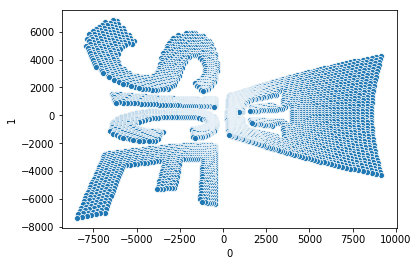

In [8]:
# Plotting the results
df = pd.DataFrame(Y[:,0:2])
ax = sns.scatterplot(x=df[0], y=df[1], data=df)